In [20]:
import pickle
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from numpy import exp
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [21]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict0 = pickle.load(fo, encoding='bytes')
        dict1 = dict0[b'labels']
        dict2 = dict0[b'data']
        
    return dict1, dict2

In [22]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
labels = []
data = []
names = ['data_batch_1', 'data_batch_2', 'data_batch_3', 'data_batch_4', 'data_batch_5', 'data_batch_6']
for i in names:
    x, y = unpickle(i)
    labels.append(x)
    data.append(y)
labels = np.array(labels)

In [23]:
new_labels = labels.flatten()
new_data = []
for i in data:
    for j in i:
        new_data.append(j)
new_data = np.array(new_data)
data = np.array(data)
#new_labels = np.reshape(new_labels,(1,len(new_labels)))
new_data = new_data/225
print(labels.shape)
print(data.shape)
print(new_labels.shape)
print(new_data.shape)
new_labels_encoded = np.eye(10)[new_labels]
print(new_labels_encoded.shape)

(6, 10000)
(6, 10000, 1024)
(60000,)
(60000, 1024)
(60000, 10)


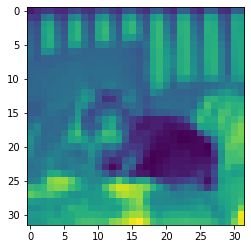

In [24]:
_ = 150
img1 = np.reshape(new_data[_], (32,32))
plt.imshow(img1)

In [25]:
print(new_labels[_])
print(new_labels_encoded[_])
classes[new_labels[_]]

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


'cat'

In [26]:
print(np.unique(new_labels, return_counts = True))
X_train, X_test, Y_train, Y_test = train_test_split(new_data, new_labels_encoded, test_size=0.1, random_state=42)
#X_train, X_test, Y_train, Y_test = X_train.T, X_test.T, Y_train.T, Y_test.T
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))
(54000, 1024)
(6000, 1024)
(54000, 10)
(6000, 10)


In [27]:
sizes = [1024, 20, 20, 10]
epochs = 50
alpha = 0.04

In [28]:
input_layer= sizes[0]
hidden_1= sizes[1]
hidden_2= sizes[2]
output_layer= sizes[3]

parameters = {
    'W1':np.random.randn(hidden_1, input_layer) * np.sqrt(1. / hidden_1),
    'W2':np.random.randn(hidden_2, hidden_1) * np.sqrt(1. / hidden_2),
    'W3':np.random.randn(output_layer, hidden_2) * np.sqrt(1. / output_layer)
}

In [29]:
def compute_cost(y, y_hat):
    m = len(y_hat)
    cost =  -(1 / m) * np.sum(
        y* np.log(y_hat))

    return cost

In [30]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

def sigmoid_derivative(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

def relu(x):
    return np.where(x<=0, 0, x)

def relu_derivative(x):
    return np.where(x<0, 0, 1)

def softmax(x):
    exps = np.exp(x - x.max())
    return exps / np.sum(exps, axis=0)

def softmax_derivative(x):
    exps = np.exp(x - x.max())
    return exps / np.sum(exps, axis=0) * (1 - exps / np.sum(exps, axis=0))

In [31]:
def forward_pass(x_train):
    params = parameters

    # input layer activations becomes sample
    params['A0'] = x_train

    # input layer to hidden layer 1
    params['Z1'] = np.dot(params["W1"], params['A0'])
    params['A1'] = sigmoid(params['Z1'])

    # hidden layer 1 to hidden layer 2
    params['Z2'] = np.dot(params["W2"], params['A1'])
    params['A2'] = sigmoid(params['Z2'])

    # hidden layer 2 to output layer
    params['Z3'] = np.dot(params["W3"], params['A2'])
    params['A3'] =  655(params['Z3'])

    return params['A3']

In [32]:
def backward_pass(y_train, output):

    params = parameters
    error_dict = {}

    # Calculate W3 update
    error = 2 * (output - y_train) / output.shape[0] * softmax_derivative(params['Z3'])
    error_dict['W3'] = np.outer(error, params['A2'])

    # Calculate W2 update
    error = np.dot(params['W3'].T, error) * sigmoid_derivative(params['Z2'])
    error_dict['W2'] = np.outer(error, params['A1'])

    # Calculate W1 update
    error = np.dot(params['W2'].T, error) * sigmoid_derivative(params['Z1'])
    error_dict['W1'] = np.outer(error, params['A0'])

    return error_dict


In [33]:
def update(changes_to_w):
    for key, value in changes_to_w.items():
        parameters[key] -= alpha * value

In [34]:
def Accuracy(X,Y, loss = False):
    predictions = []
    distribution = []

    for x, y in zip(X, Y):
        output = forward_pass(x)
        distribution.append(output)
        pred = np.argmax(output)
        predictions.append(pred == np.argmax(y))
    loss = compute_cost(distribution, Y)
    if loss == True:
        return loss
    else:
        return np.mean(predictions)


In [35]:
def Train(x_train, y_train, x_val, y_val,alpha):
    acc = []
    l = []
    for iteration in range(epochs):
        for x,y in zip(x_train, y_train):
            output = forward_pass(x)
            
            changes_to_w = backward_pass(y, output)
            update(changes_to_w)
        
        accuracy = Accuracy(x_val, y_val)
        accuracy_train = Accuracy(x_train, y_train)
            
        acc.append(accuracy)
        if iteration > 0:
            if acc[iteration] < acc[iteration-1]:
                alpha/=2

        print('Epoch: {0}, Accuracy: {1:.2f}%, Accuracy_train: {2:.2f}%'.format(
            iteration+1, accuracy * 100, accuracy_train * 100
        ))
        
    return l


In [36]:
LOSS = Train(X_train, Y_train, X_test, Y_test,alpha)

Epoch: 1, Accuracy: 19.40%, Accuracy_train: 20.10%
Epoch: 2, Accuracy: 21.51%, Accuracy_train: 22.09%
Epoch: 3, Accuracy: 24.35%, Accuracy_train: 25.04%
Epoch: 4, Accuracy: 27.10%, Accuracy_train: 27.98%
Epoch: 5, Accuracy: 28.88%, Accuracy_train: 30.25%
Epoch: 6, Accuracy: 30.56%, Accuracy_train: 31.81%
Epoch: 7, Accuracy: 31.93%, Accuracy_train: 33.14%
Epoch: 8, Accuracy: 33.11%, Accuracy_train: 34.40%
Epoch: 9, Accuracy: 34.66%, Accuracy_train: 35.72%
Epoch: 10, Accuracy: 36.14%, Accuracy_train: 37.11%
Epoch: 11, Accuracy: 37.32%, Accuracy_train: 38.20%
Epoch: 12, Accuracy: 39.17%, Accuracy_train: 40.10%
Epoch: 13, Accuracy: 40.44%, Accuracy_train: 41.47%
Epoch: 14, Accuracy: 41.62%, Accuracy_train: 42.78%
Epoch: 15, Accuracy: 41.39%, Accuracy_train: 43.01%
Epoch: 16, Accuracy: 41.97%, Accuracy_train: 43.34%
Epoch: 17, Accuracy: 42.29%, Accuracy_train: 43.57%
Epoch: 18, Accuracy: 42.44%, Accuracy_train: 43.94%
Epoch: 19, Accuracy: 42.69%, Accuracy_train: 44.18%
Epoch: 20, Accuracy: 

In [37]:
print(LOSS)

[0.32796296296296296, 0.3261296296296296, 0.32422222222222224, 0.3227407407407407, 0.32075925925925924, 0.31837037037037036, 0.3152962962962963, 0.31246296296296294, 0.31072222222222223, 0.30666666666666664, 0.30192592592592593, 0.29353703703703704, 0.28479629629629627, 0.27116666666666667, 0.2614444444444444, 0.23985185185185184, 0.191]
